## Dataset Overview
HAM10000 ("Human Against Machine with 10000 training images") dataset - a large collection of multi-source dermatoscopic images of pigmented lesions

The dermatoscopic images are collected from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images.

It has 7 different classes of skin cancer which are listed below :
- Melanocytic nevi
- Melanoma
- Benign keratosis-like lesions
- Basal cell carcinoma
- Actinic keratoses
- Vascular lesions
- Dermatofibroma 

## Importing libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation
from sklearn.metrics import classification_report, accuracy_score


## Reading the Data

In [2]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


## Data Preprocessing
## Data Cleaning

In [3]:
data['label'].unique()

array([2, 4, 3, 6, 5, 1, 0])

In [4]:
y = data['label']
x = data.drop(columns = ['label'])

In [5]:
data.isnull().sum().sum() #no null values present

0

In [6]:
meta_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
meta_data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [8]:
y = data['label']
x = data.drop(columns = ['label'])

In [9]:
data.isnull().sum().sum() #no null values present

0

In [10]:
meta_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [11]:
meta_data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Frequency Distribution of Classes')

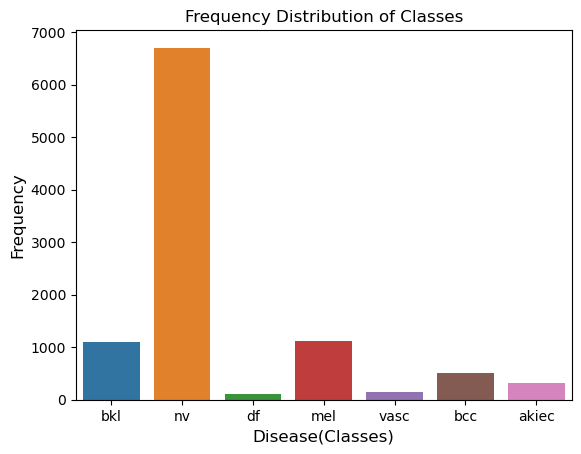

In [12]:
sns.countplot(x = 'dx', data = meta_data)
plt.xlabel('Disease(Classes)', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes')


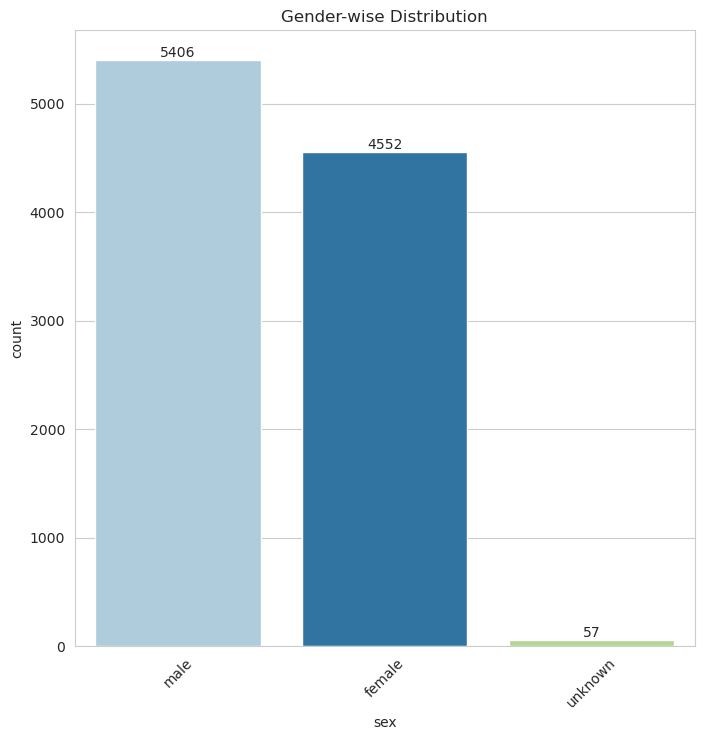

In [13]:
sns.set_style('whitegrid')
colors = ['#87ace8','#e3784d', 'green']
fig,axes = plt.subplots(figsize=(8,8))

ax = sns.countplot(x='sex',data=meta_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender-wise Distribution')
plt.xticks(rotation=45)
plt.show()

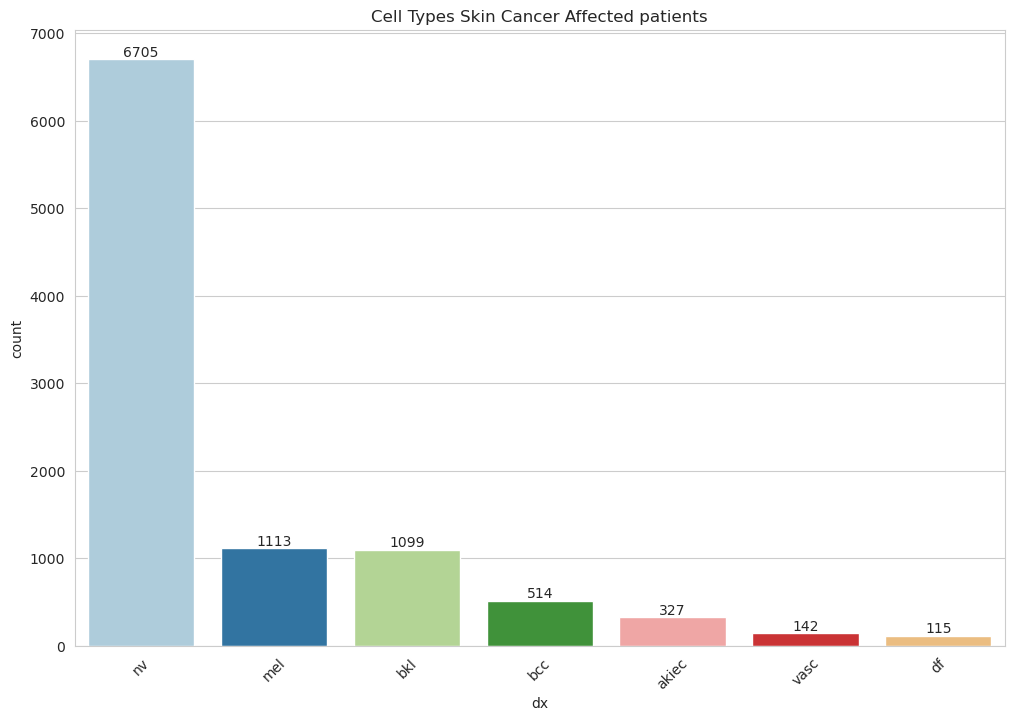

In [14]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx',data=meta_data, order = meta_data['dx'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Skin Cancer Affected patients')
plt.xticks(rotation=45)
plt.show()

In [15]:
classes = {2:'bkl', 4:'nv', 3:'df', 6:'mel', 5:'vasc', 1:'bcc', 0:'akiec'}

classes_labels=[]
for key in classes.keys():
    classes_labels.append(key)
print(classes_labels)

[2, 4, 3, 6, 5, 1, 0]


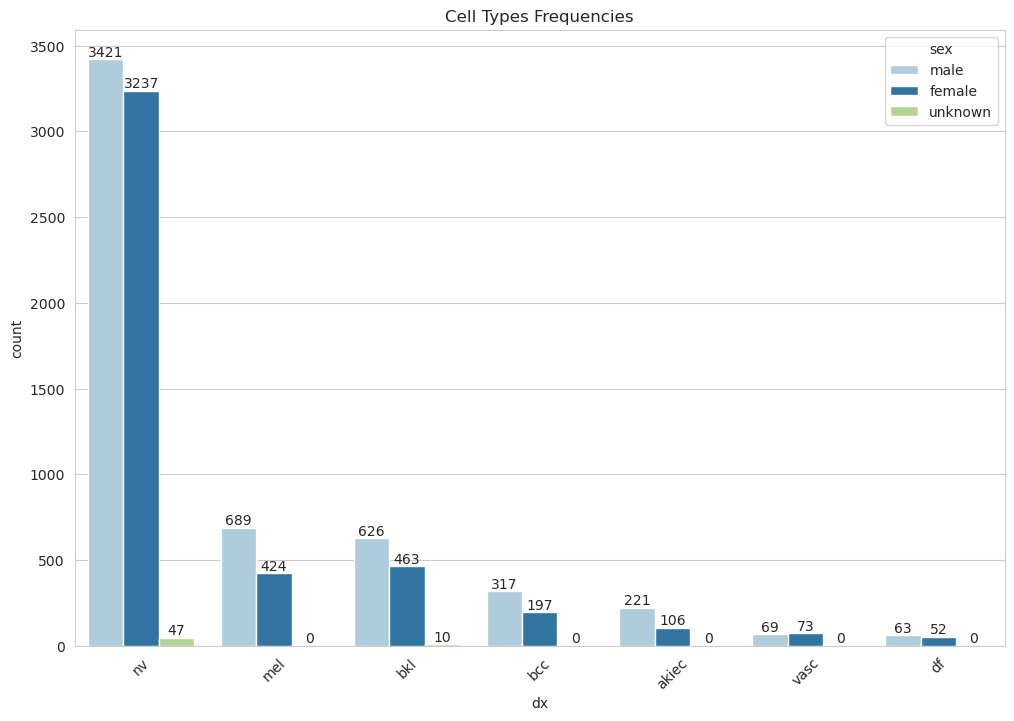

In [16]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx',hue='sex', data=meta_data, order = meta_data['dx'].value_counts().index, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Cell Types Frequencies')
plt.xticks(rotation=45)
plt.show()

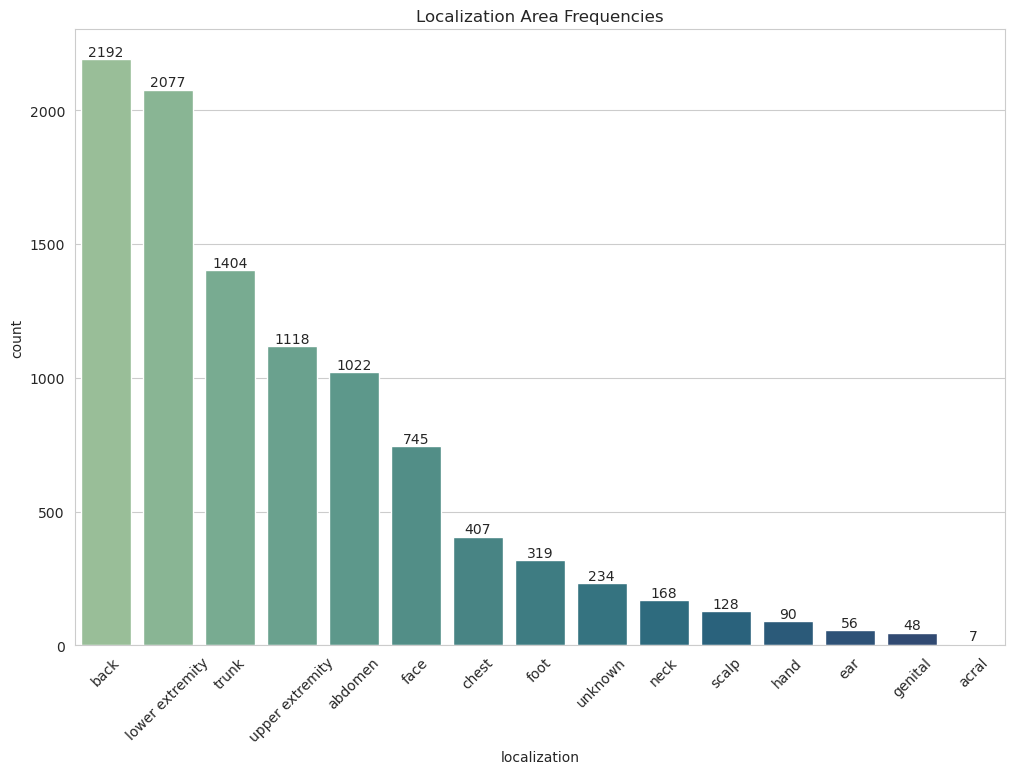

In [17]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization',data=meta_data, order = meta_data['localization'].value_counts().index, palette = 'crest')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Localization Area Frequencies')
plt.xticks(rotation=45)
plt.show()

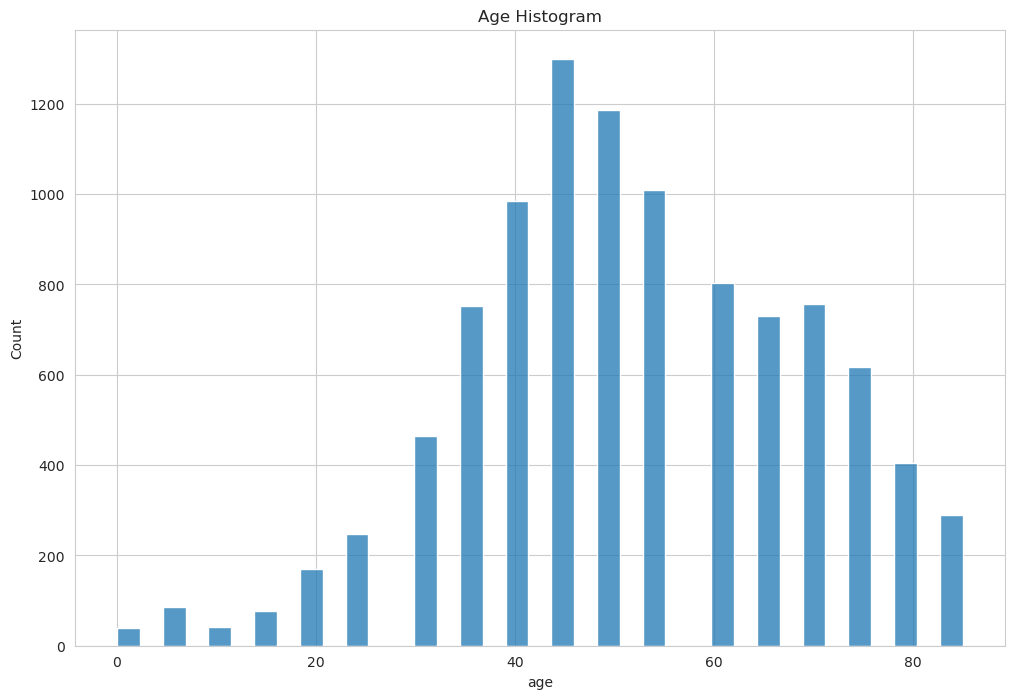

In [18]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=meta_data, x='age')
plt.title('Age Histogram')
plt.show()

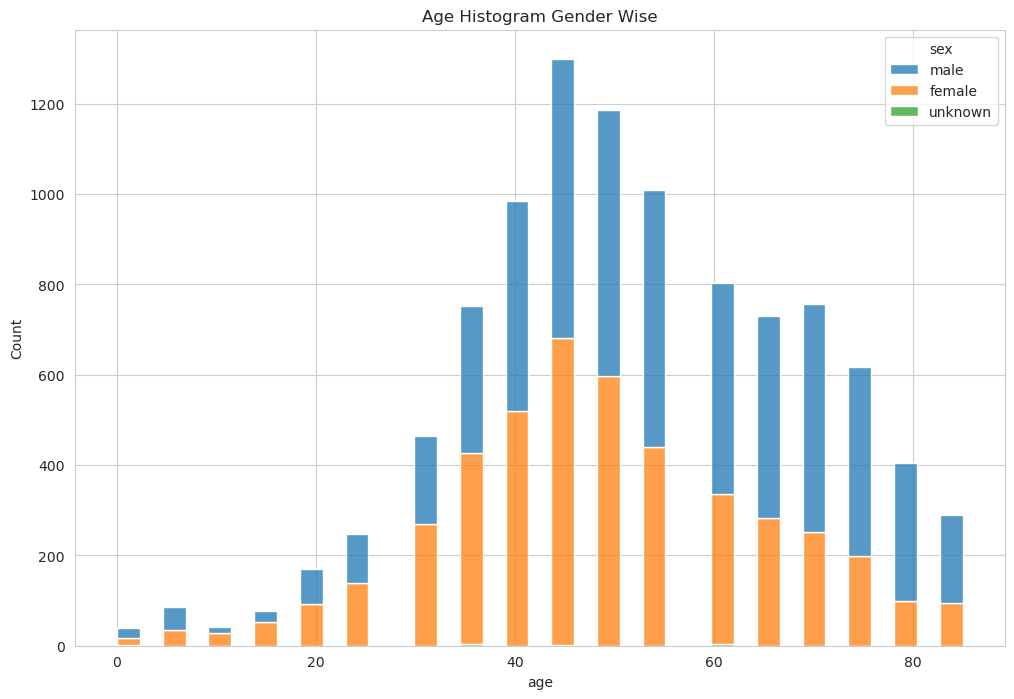

In [19]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=meta_data, x='age',hue='sex',multiple='stack')
plt.title('Age Histogram Gender Wise')
plt.show()

In [20]:
print(x.shape,y.shape)
# To overcome class imbalace
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
print(x.shape,y.shape)

(10015, 2352) (10015,)
(46935, 2352) (46935,)


In [21]:
# reshaping the data so that it can be taken by convolution neural network(without disturbing the no. of samples)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)
print('Shape of y :',y.shape)

Shape of X : (46935, 28, 28, 3)
Shape of y : (46935,)


In [22]:
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape , Y_test.shape)

(37548, 28, 28, 3) (37548,)
(9387, 28, 28, 3) (9387,)


In [23]:
model_CNN = Sequential()
model_CNN.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2)))

model_CNN.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model_CNN.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model_CNN.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation = 'relu'))
model_CNN.add(Dense(32))
model_CNN.add(Activation(activation='relu'))
model_CNN.add(Dense(16))
model_CNN.add(Activation(activation='relu'))
model_CNN.add(Dense(7))
model_CNN.add(Activation(activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_CNN.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
print(model_CNN.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')
history = model_CNN.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 64,
                    epochs = 50,
                    callbacks = [reduce_lr, early_stop])

Epoch 1/50
470/470 [==============================] - 11s 7ms/step - loss: 1.7157 - accuracy: 0.3471 - val_loss: 1.2781 - val_accuracy: 0.4830 - lr: 0.0010
Epoch 2/50
470/470 [==============================] - 3s 6ms/step - loss: 1.0987 - accuracy: 0.5657 - val_loss: 0.9553 - val_accuracy: 0.6338 - lr: 0.0010
Epoch 3/50
470/470 [==============================] - 3s 7ms/step - loss: 0.8349 - accuracy: 0.6819 - val_loss: 0.6886 - val_accuracy: 0.7507 - lr: 0.0010
Epoch 4/50
470/470 [==============================] - 3s 6ms/step - loss: 0.6062 - accuracy: 0.7712 - val_loss: 0.7442 - val_accuracy: 0.7342 - lr: 0.0010
Epoch 5/50
470/470 [==============================] - 3s 6ms/step - loss: 0.4719 - accuracy: 0.8209 - val_loss: 0.4136 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 6/50
470/470 [==============================] - 3s 6ms/step - loss: 0.3896 - accuracy: 0.8535 - val_loss: 0.3984 - val_accuracy: 0.8538 - lr: 0.0010
Epoch 7/50
470/470 [==============================] - 3s 6ms/step - l

In [25]:
results = model_CNN.evaluate(X_test , Y_test, verbose=0)

print("CNN Model Test Results")
print("        Test Loss: {:.5f}".format(results[0]))
print("    Test Accuracy: {:.2f}%".format(results[1] * 100))

CNN Model Test Results
        Test Loss: 0.10943
    Test Accuracy: 97.72%


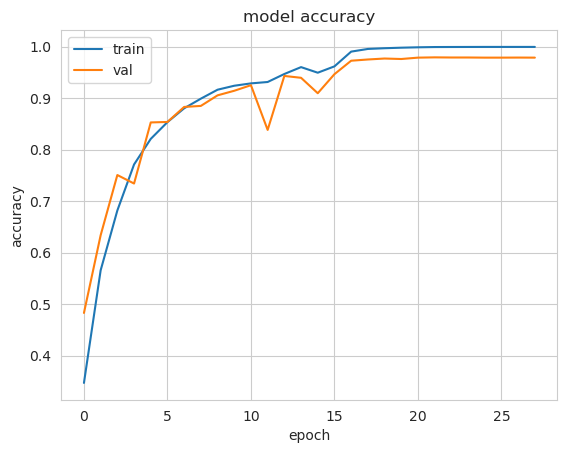

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

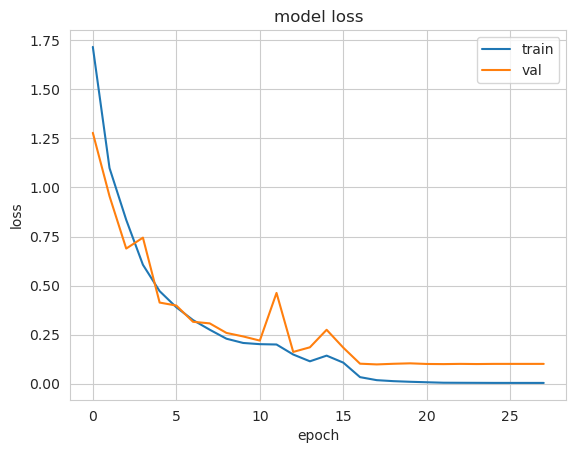

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

y_true_CNN = list(Y_test)
y_pred_CNN = model_CNN.predict(X_test)
y_pred_CNN = list(map(lambda x: np.argmax(x), y_pred_CNN))
print("Predicting First Ten Rows:")
print('Y Actual Values :' , y_true_CNN[0:10])
print('Y Predicted Values :' , y_pred_CNN[0:10])

294/294 [==============================] - 1s 2ms/step
Predicting First Ten Rows:
Y Actual Values : [5, 1, 4, 0, 5, 0, 2, 0, 3, 2]
Y Predicted Values : [5, 1, 4, 0, 5, 0, 2, 0, 3, 2]


[[1246    5    0    6    0    0    5]
 [  57 1199    4   88    6   11    9]
 [   0    0 1351    0    0    0    0]
 [   3   19    0 1342    1    0    0]
 [   0    0    0    0 1358    0    0]
 [   0    0    0    0    0 1318    0]
 [   0    0    0    0    0    0 1359]]


<AxesSubplot:>

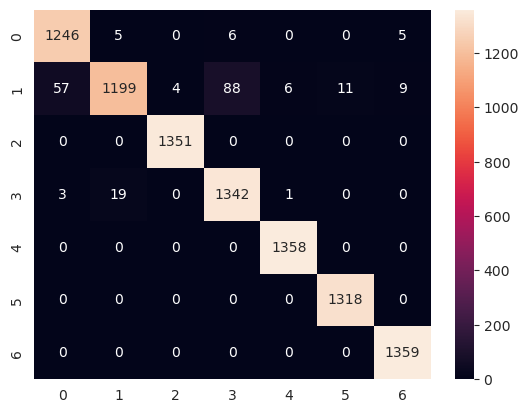

In [29]:
cm_CNN = confusion_matrix(y_true_CNN,y_pred_CNN,labels=classes_labels)
print(confusion_matrix(y_true_CNN,y_pred_CNN,labels=classes_labels))
sns.heatmap(cm_CNN, annot = True, fmt='')

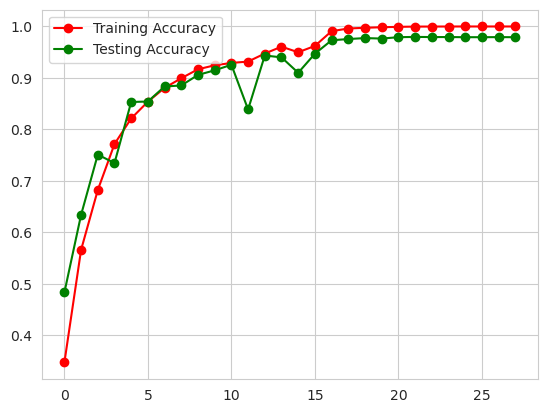

In [30]:
#training acc vs testing acc graph
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

In [31]:
#predicting
y_pred_CNN  = model_CNN.predict(X_test)
target_names = [f"{classes[i]}" for i in range(7)]
y_pred_CNN = list(map(lambda x: np.argmax(x), y_pred_CNN))
print("CNN Model Prediction Results")
print(classification_report(Y_test , y_pred_CNN,target_names=target_names))

294/294 [==============================] - 1s 2ms/step
CNN Model Prediction Results
              precision    recall  f1-score   support

       akiec       0.99      1.00      0.99      1359
         bcc       0.99      1.00      1.00      1318
         bkl       0.95      0.99      0.97      1262
          df       1.00      1.00      1.00      1351
          nv       0.98      0.87      0.92      1374
        vasc       0.99      1.00      1.00      1358
         mel       0.93      0.98      0.96      1365

    accuracy                           0.98      9387
   macro avg       0.98      0.98      0.98      9387
weighted avg       0.98      0.98      0.98      9387



In [32]:
# Layers definitions
from keras import backend as K
for l in range(len(model_CNN.layers)):
    print(l, model_CNN.layers[l])

0 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f242e2fa2d0>
1 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f23c003a090>
2 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f23bfc5e0d0>
3 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f23bfc5e4d0>
4 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f242e078590>
5 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f23bfc7ebd0>
6 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f23bfc778d0>
7 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f23bfc85090>
8 <keras.layers.reshaping.flatten.Flatten object at 0x7f23bfa4b9d0>
9 <keras.layers.core.dense.Dense object at 0x7f23bfa4b250>
10 <keras.layers.core.dense.Dense object at 0x7f242e0b3b50>
11 <keras.layers.core.activation.Activation object at 0x7f23bfc69c10>
12 <keras.layers.core.dense.Dense object at 0x7f23bfc5e150>
13 <keras.layers.core.activation.Activation object at 0x7f242e0fd2d0>
14 <keras.layers.core.den

In [33]:
model_CNN.layers[-2]

In [34]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


## Separating Features Layers from the CNN Model

In [35]:
import tensorflow as tf
# feature_extractor = tf.keras.Model(inputs=model_CNN.input, 
#                                     outputs=model_CNN.get_layer(-2).output)
# output_layers_model =tf.keras.Model(inputs=model_CNN.input, outputs=model_CNN.output)
# cnn_layer_output = model_CNN.layers[-2].output
# cnn_model_features = tf.keras.Model(inputs=model_CNN.input, outputs=cnn_layer_output)
cnn_model_features = tf.keras.Model(inputs=model_CNN.input, outputs=model_CNN.layers[-3].output)


## Extracting Features from CNN Model

In [36]:
# Extract features from input data using the CNN model
X_train_cnn = cnn_model_features.predict(X_train)
X_test_cnn = cnn_model_features.predict(X_test)

294/294 [==============================] - 1s 2ms/step


## Integrating CNN with SVM Classifier using Grid Search for Best Perameters

In [37]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train_cnn, Y_train)
# Evaluate the combined CNN-SVM model on a test dataset
svm_accuracy = clf.score(X_test_cnn, Y_test)
print('SVM Accuracy:', svm_accuracy*100)
y_testSVM = clf.predict(X_test_cnn)

SVM Accuracy: 98.22094385852776


In [38]:
svm_accuracy = clf.score(X_test_cnn, Y_test)
print('SVM Accuracy:', svm_accuracy*100)
svmclf = clf.best_estimator_
print(svmclf)
svmclf.fit(X_train_cnn, Y_train)
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testSVM)*100))

SVM Accuracy: 98.22094385852776
SVC(C=10, gamma=0.001)
Accuracy: 98.22094385852776


In [39]:
y_testSVM = svmclf.predict(X_test_cnn)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testSVM,target_names=target_names))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testSVM)*100))

              precision    recall  f1-score   support

       akiec       0.99      1.00      1.00      1359
         bcc       0.99      1.00      1.00      1318
         bkl       0.97      0.99      0.98      1262
          df       1.00      1.00      1.00      1351
          nv       0.98      0.90      0.94      1374
        vasc       1.00      1.00      1.00      1358
         mel       0.95      0.99      0.97      1365

    accuracy                           0.98      9387
   macro avg       0.98      0.98      0.98      9387
weighted avg       0.98      0.98      0.98      9387

Accuracy: 98.22094385852776


## Integrating CNN with Random Forest Classifier using Grid Search for Best Perameters

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1.0, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 50]}
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(X_train_cnn, Y_train)
RFC_accuracy = rgclf.score(X_test_cnn, Y_test)
print('Random Forest Classifier Accuracy:', RFC_accuracy*100)
y_test_RF = rgclf.predict(X_test_cnn)
print("Accuracy: {0}".format(accuracy_score(Y_test, y_test_RF)*100))

Random Forest Classifier Accuracy: 98.46596356663471
Accuracy: 98.46596356663471


In [41]:
y_test_RF = rgclf.predict(X_test_cnn)
print("Accuracy: {0}".format(accuracy_score(Y_test, y_test_RF)*100))
RFclf = rgclf.best_estimator_
RFclf.fit(X_test_cnn, Y_test)
print(RFclf)
y_testRFC = RFclf.predict(X_test_cnn)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testRFC,target_names=target_names))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testRFC)*100))

Accuracy: 98.46596356663471
RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=1,
                       min_samples_split=3, n_estimators=50)
              precision    recall  f1-score   support

       akiec       1.00      1.00      1.00      1359
         bcc       1.00      1.00      1.00      1318
         bkl       1.00      1.00      1.00      1262
          df       1.00      1.00      1.00      1351
          nv       1.00      1.00      1.00      1374
        vasc       1.00      1.00      1.00      1358
         mel       1.00      1.00      1.00      1365

    accuracy                           1.00      9387
   macro avg       1.00      1.00      1.00      9387
weighted avg       1.00      1.00      1.00      9387

Accuracy: 100.0


## Integrating CNN with KNN Classifier using Grid Search for Best Perameters

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [1, 5, 10,30],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski','euclidean','manhattan'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(X_train_cnn, Y_train)
KNN_accuracy = kgclf.score(X_test_cnn, Y_test)
print('KNN Classifier Accuracy:', KNN_accuracy*100)

KNN Classifier Accuracy: 98.50857568978374


In [43]:
y_testKNN = kgclf.predict(X_test_cnn)
KNNclf = kgclf.best_estimator_
print(KNNclf)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testKNN,target_names=target_names))
print("Accuracy Score: {0}".format(accuracy_score(Y_test, y_testKNN)*100))

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

       akiec       0.99      1.00      1.00      1359
         bcc       0.99      1.00      1.00      1318
         bkl       0.96      1.00      0.98      1262
          df       1.00      1.00      1.00      1351
          nv       0.99      0.91      0.95      1374
        vasc       1.00      1.00      1.00      1358
         mel       0.95      0.99      0.97      1365

    accuracy                           0.99      9387
   macro avg       0.99      0.99      0.98      9387
weighted avg       0.99      0.99      0.98      9387

Accuracy Score: 98.50857568978374


## Integrating CNN with Logistic Regression Classifier using Grid Search for Best Perameters

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



# Create a logistic regression object
lr = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2']}

# Perform grid search with 5-fold cross-validation
grid_search_LR = GridSearchCV(lr, param_grid, cv=5)
grid_search_LR.fit(X_train_cnn, Y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search_LR.best_params_)
y_test_LR = grid_search_LR.predict(X_test_cnn)

print(classification_report(Y_test, y_test_LR,target_names=target_names))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_test_LR)*100))


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best hyperparameters:  {'C': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

       akiec       0.99      1.00      1.00      1359
         bcc       0.99      1.00      1.00      1318
         bkl       0.96      0.98      0.97      1262
          df       1.00      1.00      1.00      1351
          nv       0.98      0.90      0.94      1374
        vasc       1.00      1.00      1.00      1358
         mel       0.94      0.98      0.96      1365

    accuracy                           0.98      9387
   macro avg       0.98      0.98      0.98      9387
weighted avg       0.98      0.98      0.98      9387

Accuracy: 98.07180142750612


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
